In [12]:
import pandas as pd
import numpy as np

##### 数据查看

In [13]:
# 附件一至附件四
data1 = pd.read_excel("CUMCM2023Problems/C题/6 个蔬菜品类的商品信息.xlsx")
data2 = pd.read_excel("CUMCM2023Problems/C题/销售流水明细数据.xlsx")
data3 = pd.read_excel("CUMCM2023Problems/C题/蔬菜类商品的批发价格.xlsx")
data4 = pd.read_excel("CUMCM2023Problems/C题/蔬菜类商品的近期损耗率.xlsx")


In [14]:
print(data1.columns)
print(data2.columns)
print(data3.columns)
print(data4.columns)

Index(['单品编码', '单品名称', '分类编码', '分类名称'], dtype='object')
Index(['销售日期', '扫码销售时间', '单品编码', '销量(千克)', '销售单价(元/千克)', '销售类型', '是否打折销售'], dtype='object')
Index(['日期', '单品编码', '批发价格(元/千克)'], dtype='object')
Index(['单品编码', '单品名称', '损耗率(%)'], dtype='object')


In [15]:
data2[data2['是否打折销售'] == '是'][['销售日期', '扫码销售时间']].value_counts()

销售日期        扫码销售时间      
2021-08-15  11:45:26.233    2
2020-07-01  13:10:00.170    1
2022-09-28  19:21:04.405    1
            17:58:01.589    1
            18:24:14.777    1
                           ..
2021-10-24  15:56:30.756    1
            17:00:41.951    1
            17:05:07.933    1
            17:09:57.735    1
2023-06-30  21:32:10.219    1
Length: 47365, dtype: int64

In [16]:
# 附件二切分demo，便于编程，最终应删去
data2_replace = data2.sample(100000)

# 删除未售出商品
p = [102900011032145,
     102900011023648,
     102900011011782,
     102900005116776,
     102900005116042]
data1.drop(labels=data1[data1['单品编码'].isin(p)].index, axis=0, inplace=True)
data3.drop(labels=data3[data3['单品编码'].isin(p)].index, axis=0, inplace=True)
data4.drop(labels=data4[data4['单品编码'].isin(p)].index, axis=0, inplace=True)

# 合并表一与表二
datas_replace = pd.merge(data2_replace, data1, how='left', on='单品编码')
datas = pd.merge(data2, data1, how='left', on='单品编码')

x = data2['销售日期'].value_counts().keys().sort_values()
y1 = data1['单品编码'].value_counts().keys().tolist()
y2 = data1['分类编码'].value_counts().keys().tolist()
# datas=[data1,data2,data3,data4]

##### 清洗数据（未发现异常数据，暂时没有此步骤）

In [17]:
# for i in datas:
#     for j in i.columns:
#         print(i[j].value_counts())

### 问题一

In [18]:
# # 获得每日销售总量
# Totaldailysales = pd.DataFrame(
#     columns=['销售日期', '销量(千克)', '单品编码/分类编码', '单品名称', '分类编码', '分类名称'])
# Totaldailysales.set_index(['销售日期', '单品编码/分类编码'], drop=True, inplace=True)
# for i in datas['销售日期'].value_counts().keys():
#     daydata = datas[datas['销售日期'] == i]
#     for j in daydata['单品编码'].value_counts().keys():
#         daydata1 = daydata[daydata['单品编码'] == j]
#         Totaldailysales.loc[(i, j), :] = [sum(daydata1['销量(千克)'])] + daydata1.iloc[0][
#             ['单品名称', '分类编码', '分类名称']].tolist()
#     for j in daydata['分类编码'].value_counts().keys():
#         daydata2 = daydata[daydata['分类编码'] == j]
#         Totaldailysales.loc[(i, j), :] = [sum(daydata2['销量(千克)'])] + [None] + daydata2.iloc[0][
#             ['分类编码', '分类名称']].tolist()
# # 获得每日销售总量
# Totaldailysales_replace = pd.DataFrame(
#     columns=['销售日期', '销量(千克)', '单品编码/分类编码', '单品名称', '分类编码', '分类名称'])
# Totaldailysales_replace.set_index(['销售日期', '单品编码/分类编码'], drop=True, inplace=True)
# for i in datas_replace['销售日期'].value_counts().keys():
#     daydata = datas_replace[datas['销售日期'] == i]
#     for j in daydata['单品编码'].value_counts().keys():
#         daydata1 = daydata[daydata['单品编码'] == j]
#         Totaldailysales_replace.loc[(i, j), :] = [sum(daydata1['销量(千克)'])] + daydata1.iloc[0][
#             ['单品名称', '分类编码', '分类名称']].tolist()
#     for j in daydata['分类编码'].value_counts().keys():
#         daydata2 = daydata[daydata['分类编码'] == j]
#         Totaldailysales_replace.loc[(i, j), :] = [sum(daydata2['销量(千克)'])] + [None] + daydata2.iloc[0][
#             ['分类编码', '分类名称']].tolist()
# 
# #补充Totaldailysales表
# for i in y1+y2:
#     for j in x:
#         try:
#             Totaldailysales.loc[(j, i)]
#         except:
#             Totaldailysales.loc[(j, i), :] = [0, None, None, None]

In [19]:
# 获得每日销售总量
Totaldailysales = pd.DataFrame(columns=['销售日期'] + y1 + y2)

Totaldailysales.set_index(['销售日期'], drop=True, inplace=True)
for i in x:
    daydata = datas[datas['销售日期'] == i]
    for j in daydata['单品编码'].value_counts().keys():
        daydata1 = daydata[daydata['单品编码'] == j]
        Totaldailysales.loc[i, j] = sum(daydata1['销量(千克)'])
    for j in daydata['分类编码'].value_counts().keys():
        daydata2 = daydata[daydata['分类编码'] == j]
        Totaldailysales.loc[i, j] = sum(daydata2['销量(千克)'])


In [20]:
data1

,单品编码,单品名称,分类编码,分类名称
0,102900005115168,牛首生菜,1011010101,花叶类
1,102900005115199,四川红香椿,1011010101,花叶类
2,102900005115625,本地小毛白菜,1011010101,花叶类
3,102900005115748,白菜苔,1011010101,花叶类
4,102900005115762,苋菜,1011010101,花叶类
...,...,...,...,...
246,106958851400125,海鲜菇(袋)(4),1011010801,食用菌
247,106971533450003,海鲜菇(包),1011010801,食用菌
248,106971533455008,海鲜菇(袋)(3),1011010801,食用菌
249,106973223300667,虫草花(盒)(2),1011010801,食用菌


###### 可视化,横坐标为每一天，纵坐标为当天的销售总额（kg)，这里的是分类（6类）绘图，将第7行改为y1即为对每一个单品绘图（太多了点）

In [21]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# plt.figure(figsize=(25.60, 14.40))
plt.figure(figsize=(16, 8))
lines = []
label = []
j = 0

Peaksales = pd.DataFrame(columns=['单品编码', '销量（kg）'])
Peaksales.set_index(['单品编码'], drop=True, inplace=True)

for i in y1:
    Peaksales.loc[i] = np.nansum(Totaldailysales[i])
Peaksales.sort_values(by='销量（kg）', ascending=False, inplace=True)

# for i in y1:
# for i in Peaksales.iloc[:30,].index:
for i in y2:
    # label.append(data1[data1['分类编码']==i]['分类名称'].iloc[0])
    # if (np.random.random()<0.1):
    label.append(data1[data1['单品编码'] == i]['单品名称'].values[0])
    y = []
    j = j + 1
    line, = plt.plot(x, Totaldailysales[i])
    lines.append(line)

# plt.xticks(rotation=90)
plt.legend(handles=lines, labels=label, loc='best')
plt.xlabel('日期')
plt.ylabel('每日总销量（kg）')
plt.savefig("每日总销量变化(随机10%）")
plt.show()



IndexError: index 0 is out of bounds for axis 0 with size 0

<Figure size 1600x800 with 0 Axes>

###### y1出现尖峰，检查发现为2022-11-21日，2022-11-21,102900005118831,407.0,娃娃菜,1011010101,花叶类，买了407kg娃娃菜。是否需要剔除？

###### y2出现尖峰，检查发现为2022-11-19日，不知道为什么这一天的流水多了很多，其他时候是1000单上下，这一天到了3000单，但是没有发现哪一单有问题的，应该单纯成交量大

In [ ]:
import scipy.stats as stats
import numpy as np
import pandas as pd

Averagedailyvolume = pd.DataFrame(columns=['单品编码/分类编码', '平均每日销量(千克)'])
Averagedailyvolume.set_index(['单品编码/分类编码'], drop=True, inplace=True)
Totaldays = Totaldailysales.shape[0]
for i in y2:
    Averagedailyvolume.loc[i, '平均每日销量(千克)'] = np.nansum(Totaldailysales[i]) / Totaldays
    # Averagedailyvolume.loc[i,'平均每日销量(千克)']=np.nanmean(Totaldailysales[i])
Averagedailyvolume.dropna(axis=0, how='all', inplace=True)
Averagedailyvolume

###### 数据标准化

In [ ]:
from sklearn.preprocessing import StandardScaler

transfer = StandardScaler()
Averagedailyvolume = transfer.fit_transform(
    np.array([Averagedailyvolume.index, Averagedailyvolume['平均每日销量(千克)']]).T)

##### levene检验，Brown-Forsythe检验，

In [ ]:
# edu = [Averagedailyvolume.index, Averagedailyvolume['平均每日销量(千克)']]
# # edu=[Averagedailyvolume[:,0], Averagedailyvolume[:,1]]
# # levene检验
# (levene_W, levene_p) = stats.levene(*edu)
# print(levene_W, levene_p)
# 
# # Brown-Forsythe检验
# (Brown_W, Brown_p) = stats.levene(edu[0], edu[1], center='median')
# print(Brown_W, Brown_p)
# # f检验
# f_value, p_value = stats.f_oneway(edu[0], edu[1])
# print("F-value:", f_value)
# print("P-value:", p_value)

###### 方差分析

In [ ]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from statsmodels.formula.api import ols
# from scipy.stats import levene
# from scipy.stats import kstest
# from statsmodels.stats.anova import anova_lm  #方差分析
# from statsmodels.stats.multicomp import pairwise_tukeyhsd  #两两比较
# import pingouin as pg
# 
# 
# def anova_d(column, data):
#     if levene_p.pvalue > 0.05:
#         formula = column + "~ C(market_type)"
#         model = anova_lm(ols(formula, data=data).fit())
#         print(model)
#         re = pairwise_tukeyhsd(data[column], data['market_type'], alpha=0.05)
#         print('多重比较：')
#         print(re.summary())
#     else:
#         model = pg.welch_anova(dv=column, between='market_type', data=data)
#         print(model)
#         print('多重比较：')
#         print(pg.pairwise_gameshowell(dv=column, between='market_type', data=data))

In [ ]:
# import scipy.stats as stats
# import numpy as np
# import pandas as pd
# 
# for i in data2['单品编码'].value_counts().keys():
#     # levene检验（未通过）
#     (W, p) = stats.levene(data2[data2['单品编码'] == i]['销量(千克)'])
#     print(W, p)
# 
#     # Brown-Forsythe检验（未通过）
#     (W, p) = stats.levene(data2[data2['单品编码'] == i]['销量(千克)'], center='median')
#     print(W, p)
# 
#     f_value, p_value = stats.f_oneway(data2[data2['单品编码'] == i]['销量(千克)'])
#     print("F-value:", f_value)
#     print("P-value:", p_value)

In [ ]:
# #两组数对比时，检查独立T检验和F检验是否一致
# 
# # First, calculate the F- and the T-values, ...
# F_statistic, pVal = stats.f_oneway(data2['单品编码'], data2['销量(千克)'])
# t_val, pVal_t = stats.ttest_ind(data2['单品编码'], data2['销量(千克)'])
# 
# # ... and show that t**2 = F
# print('\nT^2 == F: ------------------------------------------')
# print(('From the t-test we get t^2={0:5.3f}, and from the F-test F={1:5.3f}'.format(t_val ** 2, F_statistic)))
# 
# # numeric test
# np.testing.assert_almost_equal(t_val ** 2, F_statistic, decimal=0)
# 
# print(F_statistic)


###### 无法通过levene检验（方差齐次），不太适合方差分析

###### 可视化,关系矩阵热力图，将第4行改为y1即为对每一个单品绘图（基本没法看）

In [ ]:
import seaborn as sns
from scipy import stats

Correlationmatrix = pd.DataFrame()
# for i in y1:
for i in y2:
    name = data1[data1['分类编码'] == i]['分类名称'].iloc[0]
    Correlationmatrix[name] = Totaldailysales[i]
Correlationmatrix = Correlationmatrix.applymap(float)
plt.figure(figsize=(25.60, 14.40))
sns.heatmap(Correlationmatrix.corr(method='spearman'), annot=True, vmax=1, square=True, cmap="Blues",
            annot_kws={"fontsize": 15})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.savefig("品类间相关系数（spearman）热力图")
plt.show()

In [ ]:
Correlationmatrix = Correlationmatrix.fillna(0)

In [ ]:
# for i in range(6):
#     for j in range(i+1,6):
#         x,y=Correlationmatrix.iloc[:,i],Correlationmatrix.iloc[:,j]
#         print(x.name,y.name,':',stats.spearmanr(x,y))
# 
# 
#         

##### 对每一单品进行相关矩阵计算

In [ ]:
import seaborn as sns

Correlationmatrix = pd.DataFrame()
for i in y1:
    name = data1[data1['单品编码'] == i]['单品名称'].iloc[0]
    Correlationmatrix[name] = Totaldailysales[i]

Correlationmatrix.corr()

##### eta系数检测

In [ ]:
# def correlation_ratio(component, total):
#     y_component_avg = np.mean(component)
#     y_total_avg = np.mean(total)
#     numerator = np.sum(np.power(np.subtract(total, y_component_avg), 2))
#     denominator = np.sum(np.power(np.subtract(total, y_total_avg), 2))
#     if denominator == 0:
#         eta = 0.0
#     else:
#         eta = numerator / denominator
#     return 1 - eta
# 
# 
# import numpy as np
# from scipy import stats
# 
# for i in y2:
#     categorylist = data1[data1['分类编码'] == i]['单品编码'].value_counts().keys().tolist()
#     print('************************', data1[data1['分类编码'] == i]['分类名称'].iloc[0], ':***************************')
#     print(stats.kstest(np.log(data2[data2['单品编码'].isin(categorylist)]['销量(千克)']), 'norm'))
#     # for j in categorylist:
#     # print(data1[data1['单品编码']==j]['单品名称'].iloc[0])
#     # print(KStest(data2[data2['单品编码'] == j]['销量(千克)']))
#     # print(correlation_ratio(data2[data2['单品编码'] == j]['销量(千克)'],
#     #                         data2[data2['单品编码'].isin(categorylist)]['销量(千克)']))
#     print(stats.kstest((data2[data2['单品编码'].isin(categorylist)]['销量(千克)']),'norm'))


In [ ]:
data1.columns

### 第二问

In [ ]:
# 导入所需的包
import pandas as pd

# 合并销售数据和批发价格数据
merged_data_for_relation = pd.merge(data2, data3, left_on=["销售日期", "单品编码"], right_on=["日期", "单品编码"],
                                    how="left")

# 添加商品分类信息到merged_data_for_relation中
merged_data_for_relation = pd.merge(merged_data_for_relation, data1[["单品编码", "分类名称"]], on="单品编码",
                                    how="left")

# 计算总销售额和总成本
merged_data_for_relation["销售额"] = merged_data_for_relation["销量(千克)"] * merged_data_for_relation[
    "销售单价(元/千克)"]
merged_data_for_relation["成本"] = merged_data_for_relation["销量(千克)"] * merged_data_for_relation[
    "批发价格(元/千克)"]

# 按蔬菜品类分组计算总销售额和总成本
grouped_data_corrected = merged_data_for_relation.groupby("分类名称").agg(
    总销售额=("销售额", "sum"),
    总成本=("成本", "sum")
).reset_index()

# 计算成本加成比率
grouped_data_corrected["成本加成比率"] = (grouped_data_corrected["总销售额"] / grouped_data_corrected["总成本"]) - 1

print(grouped_data_corrected[["分类名称", "成本加成比率"]])

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# 选择“水生根茎类”这一蔬菜品类的数据
category_example = "水生根茎类"
test_start_date = "2023-07-01"

# 按天和蔬菜品类汇总销售量

# 使用附件1的数据来获取每种蔬菜的分类名称
merged_data_corrected = pd.merge(data2, data3, left_on=["单品编码", "销售日期"], right_on=["单品编码", "日期"],
                                 how="left")
merged_data_corrected.drop("日期", axis=1, inplace=True)
merged_data_with_category = pd.merge(merged_data_corrected, data1[['单品编码', '分类名称']], on="单品编码", how="left")

# 按天和蔬菜品类汇总销售量
daily_sales_final = merged_data_with_category.groupby(['销售日期', '分类名称'])['销量(千克)'].sum().reset_index()

example_data = daily_sales_final[daily_sales_final['分类名称'] == category_example].set_index('销售日期')

# 绘制销售数据图
plt.figure(figsize=(15, 6))
example_data['销量(千克)'].plot(title=f'{category_example} 销售数据')
plt.xlabel('日期')
plt.ylabel('销量(千克)')
plt.grid(True)
plt.show()

# 重新使用ARIMA模型进行预测
try:
    model = ARIMA(example_data['销量(千克)'], order=(1, 1, 1))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=7)

    # 绘制原始数据和预测数据
    plt.figure(figsize=(15, 6))
    example_data['销量(千克)'].plot(label='Actual')
    forecast.index = pd.date_range(start=test_start_date, periods=7, freq='D')
    forecast.plot(label='Forecast', color='red')
    plt.title(f'{category_example} Sales Forecasting')
    plt.xlabel('Date')
    plt.ylabel('Sales (kg)')
    plt.legend()
    plt.grid(True)
    plt.show()

except Exception as e:
    error_message = str(e)

error_message if 'error_message' in locals() else "Model successfully forecasted!"


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools

# 加载数据
attachment1 = data1
attachment2 = data2
attachment3 = data3

# 合并数据
merged_data = pd.merge(attachment2, attachment3, left_on=["单品编码", "销售日期"], right_on=["单品编码", "日期"],
                       how="left").drop("日期", axis=1)
merged_data_with_category = pd.merge(merged_data, attachment1[['单品编码', '分类名称']], on="单品编码", how="left")


# 获取指定蔬菜品类的数据并拟合ARIMA模型
def fit_arima_for_category(category_name):
    category_data = \
        merged_data_with_category[merged_data_with_category['分类名称'] == category_name].groupby('销售日期').sum()[
            '销量(千克)']

    # 定义p, d, q参数范围
    p = d = q = range(0, 3)
    pdq = list(itertools.product(p, d, q))

    best_aic = float("inf")
    best_order = None
    best_model = None

    for order in pdq:
        try:
            temp_model = ARIMA(category_data, order=order)
            temp_model_fit = temp_model.fit()
            if temp_model_fit.aic < best_aic:
                best_aic = temp_model_fit.aic
                best_order = order
                best_model = temp_model_fit
        except:
            continue

    return best_order, best_aic, best_model


# 尝试为"水生根茎类"和"食用菌"拟合ARIMA模型
order_aquatic, aic_aquatic, model_aquatic = fit_arima_for_category("水生根茎类")
order_fungus, aic_fungus, model_fungus = fit_arima_for_category("食用菌")


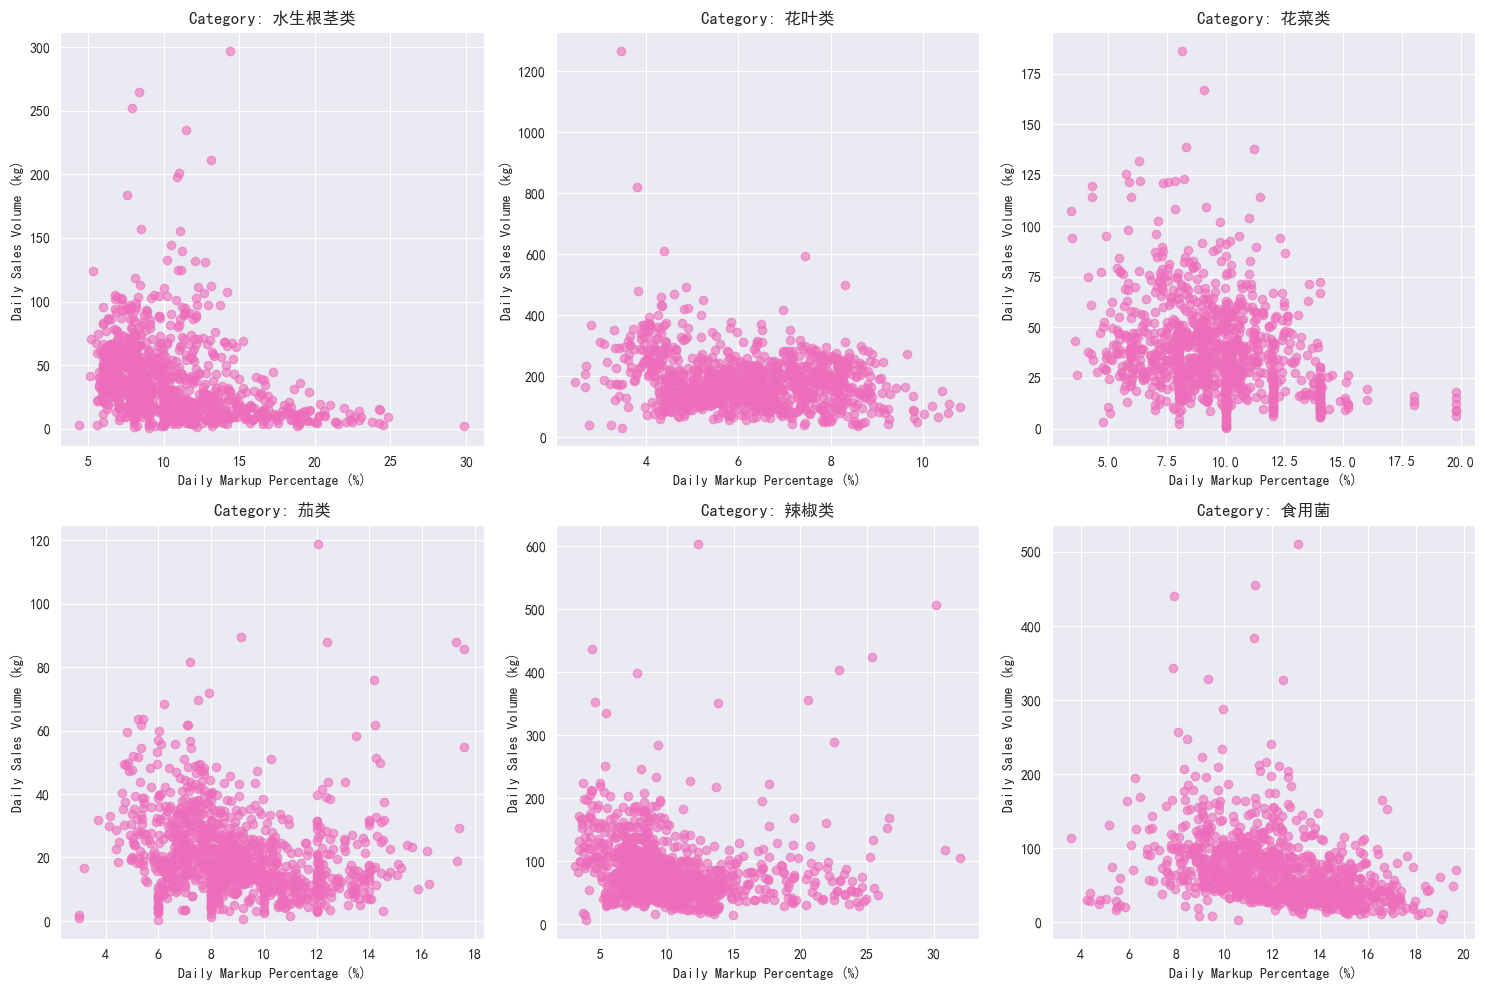

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets from the attachments
product_categories = data1
sales_data = data2
wholesale_prices = data3

# Merge sales data with product categories to get category information for each sale
sales_with_category = pd.merge(sales_data, product_categories, on="单品编码", how="left")

# Merge the sales data with wholesale prices using the correct column names
sales_with_cost = pd.merge(sales_with_category, wholesale_prices, left_on=["单品编码", "销售日期"],
                           right_on=["单品编码", "日期"], how="left")

# Group by date and product category, then aggregate the sales volume, selling price, and wholesale price
daily_category_summary = sales_with_cost.groupby(["销售日期", "分类名称"]).agg(
    daily_sales_volume=("销量(千克)", "sum"),
    daily_avg_selling_price=("销售单价(元/千克)", "mean"),
    daily_avg_wholesale_price=("批发价格(元/千克)", "mean")
).reset_index()

# Calculate daily total markup for each category (total sales revenue - total cost)
daily_category_summary["daily_total_markup"] = (
        daily_category_summary["daily_sales_volume"] * daily_category_summary["daily_avg_selling_price"]
        - daily_category_summary["daily_sales_volume"] * daily_category_summary["daily_avg_wholesale_price"])
# Calculate daily markup percentage for each category
daily_category_summary["daily_markup_percentage"] = (daily_category_summary["daily_total_markup"] / (
        daily_category_summary["daily_sales_volume"] * daily_category_summary["daily_avg_wholesale_price"])) * 100

# daily_category_summary["daily_sales_volume"]
# Plotting
plt.rcParams['font.sans-serif'] = ['SimHei']  # Display Chinese characters
plt.rcParams['axes.unicode_minus'] = False  # Display negative sign

plt.figure(figsize=(25.60, 14.40))
categories = daily_category_summary["分类名称"].unique()

for idx, category in enumerate(categories, 1):
    plt.subplot(2, 3, idx)
    category_data = daily_category_summary[daily_category_summary["分类名称"] == category]
    plt.scatter(category_data["daily_avg_selling_price"], category_data["daily_sales_volume"], color='#ed6ebb',
                alpha=0.6)
    plt.title(f"Category: {category}")
    plt.ylabel("Daily Sales Volume (kg)")
    plt.xlabel("Daily Markup Percentage (%)")
    plt.grid(True)

plt.tight_layout()
plt.show()


预测值为:
 [35.31079301 48.5686868  28.07080192 32.78507803 34.37349348 38.30864271
 38.65254181 33.14342341 39.00443542 40.67943284 41.53611836 40.95739577
 40.89931517 23.09538257 31.70947305 36.69738226 37.94001669 39.17489791
 31.0915867  26.8674542  36.10855776 37.91445704 41.44131515 34.28357034
 22.82580902 41.11199777 33.55324359 37.44810627 33.1463343  35.33436933
 51.27472187 44.99752075 39.42546184 17.112501   46.68509855 44.13082198
 40.6768078  37.48041618 30.45527212 44.41879051 40.95739577 32.40925378
 43.92929196 43.576717   41.37368674 39.59043068 41.90131434 28.14992793
 31.13521641 44.50028982 31.39635365 41.71688035 37.20647192 36.00224851
 38.87803492 43.03429399 43.93777474 37.90380897 47.66378793 37.68613777
 30.52855301 38.22724273 37.81331509 41.70048131 44.06138801 43.56134291
 50.37422942 32.03597134 33.96819751 34.42343629 42.43705874 34.54812027
 36.72672438 25.44038725 35.88522278 39.37992172 41.4528567  34.72165715
 37.45101404 43.38974837 39.31880614 39.4819

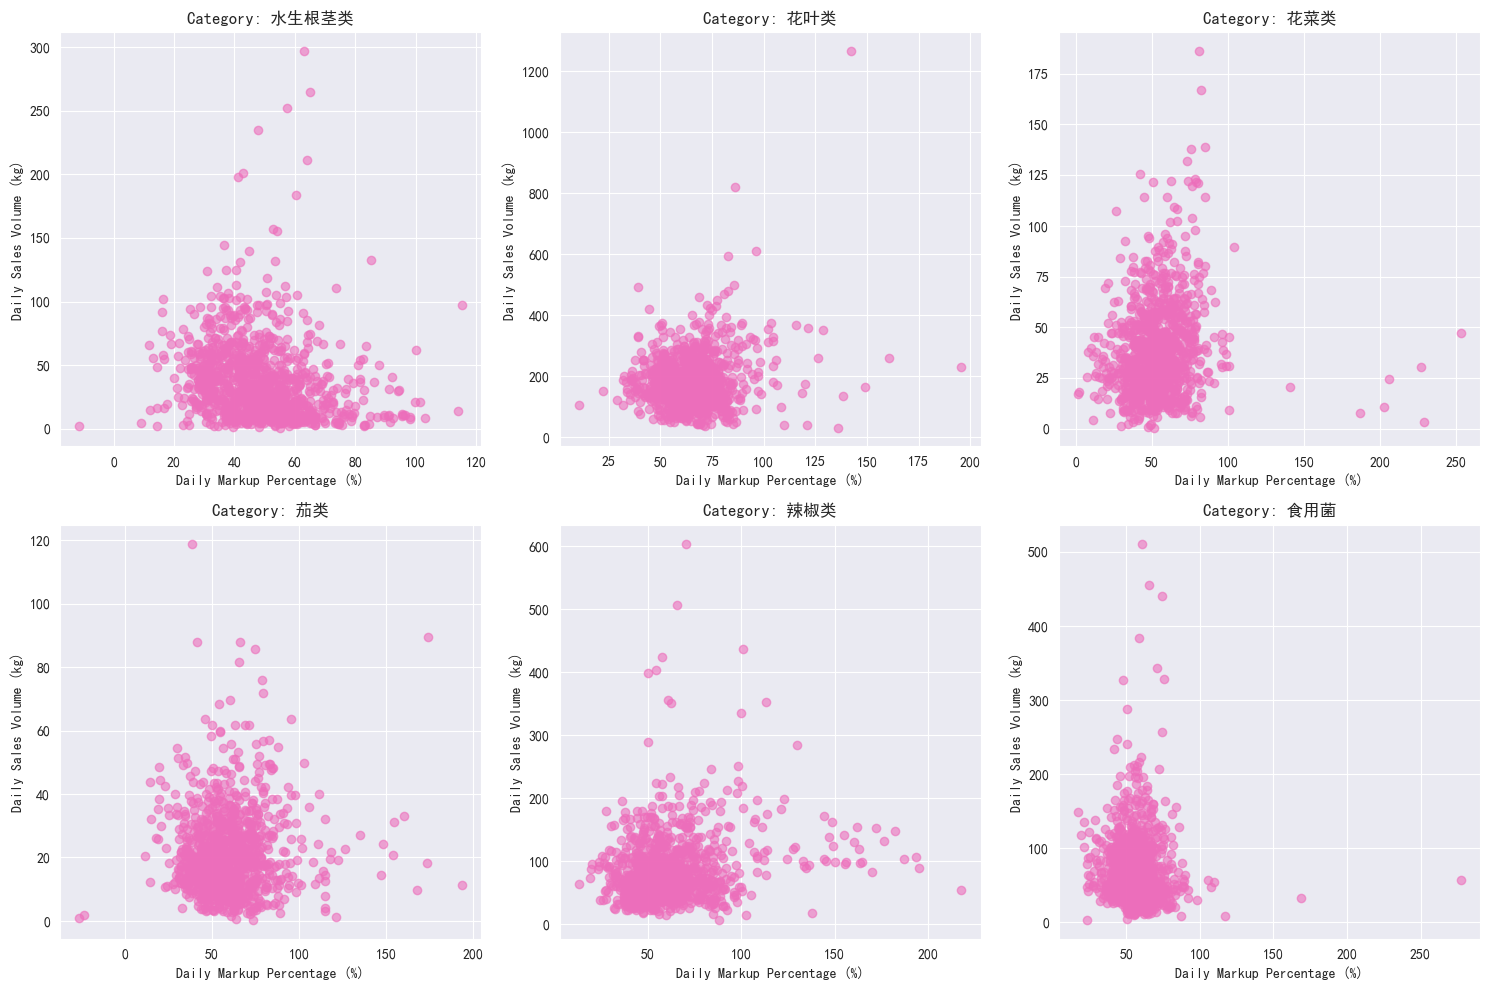

In [34]:
from sklearn.linear_model import Ridge
# from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


def ridge_demo(X, Y):
    #2 数据集的划分
    x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=22)

    #3 特征工程 - 标准化
    transfer = StandardScaler()
    x_train = transfer.fit_transform(x_train.values.reshape(-1, 1))
    x_test = transfer.transform(x_test.values.reshape(-1, 1))

    #4 岭回归
    estimator = Ridge(alpha=1)  # 法1
    # estimator = RidgeCV(alphas=(0.1, 1, 10))  # 法2
    estimator.fit(x_train, y_train)

    # 5 模型评估
    # 5.1 获取系数等值
    y_predict = estimator.predict(x_test)
    print("预测值为:\n", y_predict)
    print("模型中的系数为:\n", estimator.coef_)
    print("模型中的偏置为:\n", estimator.intercept_)

    # 5.2 评价
    # 均方误差
    error = mean_squared_error(y_test, y_predict)
    print("误差为:\n", error)
    return y_predict


import pandas as pd
import matplotlib.pyplot as plt

# Load datasets from the attachments
product_categories = data1
sales_data = data2
wholesale_prices = data3

# Merge sales data with product categories to get category information for each sale
sales_with_category = pd.merge(sales_data, product_categories, on="单品编码", how="left")

# Merge the sales data with wholesale prices using the correct column names
sales_with_cost = pd.merge(sales_with_category, wholesale_prices, left_on=["单品编码", "销售日期"],
                           right_on=["单品编码", "日期"], how="left")

# Group by date and product category, then aggregate the sales volume, selling price, and wholesale price
daily_category_summary = sales_with_cost.groupby(["销售日期", "分类名称"]).agg(
    daily_sales_volume=("销量(千克)", "sum"),
    daily_avg_selling_price=("销售单价(元/千克)", "mean"),
    daily_avg_wholesale_price=("批发价格(元/千克)", "mean")
).reset_index()

# Calculate daily total markup for each category (total sales revenue - total cost)
daily_category_summary["daily_total_markup"] = (
        daily_category_summary["daily_sales_volume"] * daily_category_summary["daily_avg_selling_price"]
        - daily_category_summary["daily_sales_volume"] * daily_category_summary["daily_avg_wholesale_price"])
# Calculate daily markup percentage for each category
daily_category_summary["daily_markup_percentage"] = (daily_category_summary["daily_total_markup"] / (
        daily_category_summary["daily_sales_volume"] * daily_category_summary["daily_avg_wholesale_price"])) * 100

# Plotting
plt.rcParams['font.sans-serif'] = ['SimHei']  # Display Chinese characters
plt.rcParams['axes.unicode_minus'] = False  # Display negative sign

plt.figure(figsize=(25.60, 14.40))
categories = daily_category_summary["分类名称"].unique()

for idx, category in enumerate(categories, 1):
    plt.subplot(2, 3, idx)
    category_data = daily_category_summary[daily_category_summary["分类名称"] == category]
    plt.scatter(category_data["daily_markup_percentage"], category_data["daily_sales_volume"], color='#ed6ebb',
                alpha=0.6)
    plt.title(f"Category: {category}")
    plt.ylabel("Daily Sales Volume (kg)")
    plt.xlabel("Daily Markup Percentage (%)")
    plt.grid(True)
    ridge_demo(category_data["daily_markup_percentage"], category_data["daily_sales_volume"])

plt.tight_layout()
plt.show()



In [24]:
category_data

,销售日期,分类名称,daily_sales_volume,daily_avg_selling_price,daily_avg_wholesale_price,daily_total_markup,daily_markup_percentage
5,2020-07-01,食用菌,35.365,11.866667,7.314917,160.972639,62.225589
11,2020-07-02,食用菌,48.510,13.638750,7.871937,279.748074,73.257854
17,2020-07-03,食用菌,42.442,14.323490,8.120671,263.260035,76.383081
23,2020-07-04,食用菌,47.262,14.091228,8.500234,264.241566,65.774592
29,2020-07-05,食用菌,73.213,12.876329,7.707923,378.394494,67.053161
...,...,...,...,...,...,...,...
6449,2023-06-26,食用菌,39.582,11.135088,7.294035,152.036545,52.660189
6455,2023-06-27,食用菌,38.708,11.103509,7.402807,143.246764,49.990520
6461,2023-06-28,食用菌,53.742,9.529167,6.268194,175.251169,52.024108
6467,2023-06-29,食用菌,48.314,9.854545,6.511515,161.515166,51.340283


水生根茎类  :  62.20465133692592  +  -2.27165120328462 x +  -0.010203565748189793 x^2
花叶类  :  402.624615230166  +  -59.73534088591999 x +  3.7123851795086926 x^2
花菜类  :  55.84356367645502  +  -1.034397988825084 x +  -0.07833774776211494 x^2
茄类  :  63.21167061781499  +  -8.342338853787828 x +  0.3794560907615357 x^2
辣椒类  :  179.0262741751165  +  -15.674648386601197 x +  0.529141176182987 x^2
食用菌  :  100.97902028466109  +  1.8065125543475193 x +  -0.34162165813835077 x^2


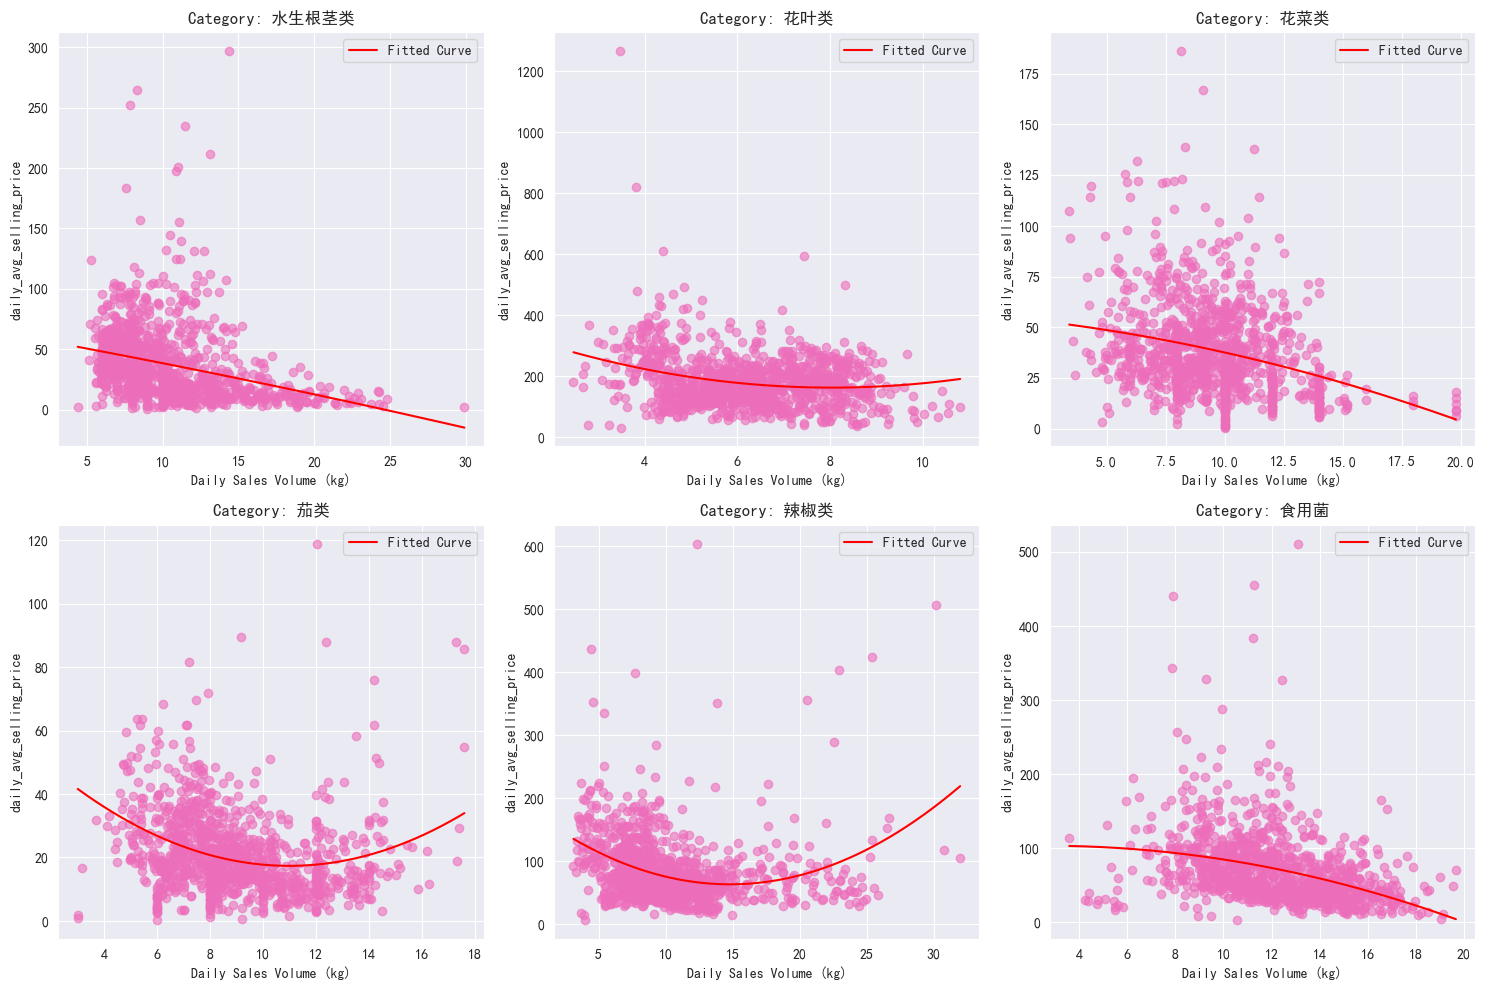

In [78]:
from sklearn.metrics import r2_score
# 多项式回归拟合

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Continue with the plotting and fitting polynomial regression
plt.figure(figsize=(15, 10))
Linearfitting = []
for idx, category in enumerate(categories, 1):
    plt.subplot(2, 3, idx)

    # Extract data for the category
    category_data = daily_category_summary[daily_category_summary["分类名称"] == category]
    y = category_data["daily_sales_volume"].values
    x = category_data["daily_avg_selling_price"].values.reshape(-1, 1)
    # X_train , X_test , y_train ,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
    # Polynomial regression
    poly = PolynomialFeatures(degree=2)
    x_poly = poly.fit_transform(x)
    LR = LinearRegression()
    poly_regressor = LR.fit(x_poly, y)
    x_new = np.linspace(x.min(), x.max(), 500).reshape(-1, 1)
    y_new = poly_regressor.predict(poly.transform(x_new))
    # #打印截距
    # print('intercept_:%.3f' % LR.intercept_)
    # #打印模型系数
    print(category, ' : ', LR.intercept_, ' + ', LR.coef_[1], 'x + ', LR.coef_[2], 'x^2')
    Linearfitting.append([category,LR.intercept_, LR.coef_[1], LR.coef_[2]])
    # #打印均方误差值
    # print('Mean squared error: %.3f' % mean_squared_error(y_test,LR.predict(X_test)))##((y_test-LR.predict(X_test))**2).mean()
    # #打印R-平方
    # print('Variance score: %.3f' % r2_score(y_test,LR.predict(X_test)))
    # #1-((y_test-LR.predict(X_test))**2).sum()/((y_test - y_test.mean())**2).sum
    # #打印准确率accuracy
    # print('score: %.3f' % LR.score(X_test,y_test))
    # Plot the data and the fitted curve
    plt.scatter(x, y, color='#ed6ebb', alpha=0.6)
    plt.plot(x_new, y_new, 'r-', label='Fitted Curve')
    plt.title(f"Category: {category}")
    plt.xlabel("Daily Sales Volume (kg)")
    plt.ylabel("daily_avg_selling_price")
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

In [79]:
Linearfitting

[['水生根茎类', 62.20465133692592, -2.27165120328462, -0.010203565748189793],
 ['花叶类', 402.624615230166, -59.73534088591999, 3.7123851795086926],
 ['花菜类', 55.84356367645502, -1.034397988825084, -0.07833774776211494],
 ['茄类', 63.21167061781499, -8.342338853787828, 0.3794560907615357],
 ['辣椒类', 179.0262741751165, -15.674648386601197, 0.529141176182987],
 ['食用菌', 100.97902028466109, 1.8065125543475193, -0.34162165813835077]]

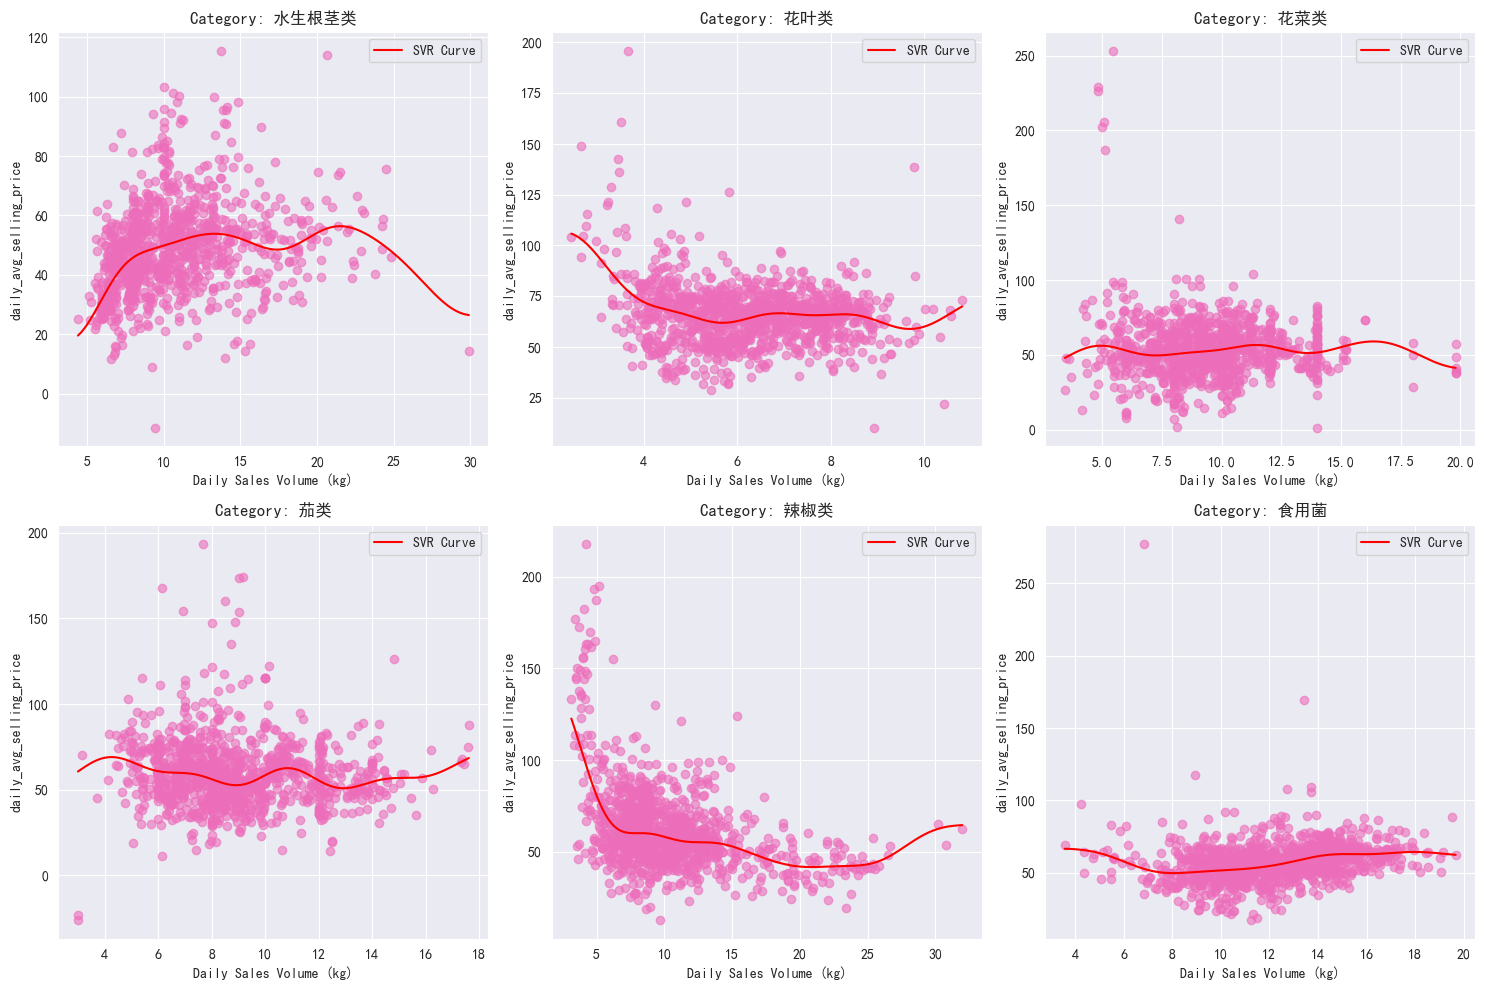

In [80]:

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

plt.figure(figsize=(15, 10))

for idx, category in enumerate(categories, 1):
    plt.subplot(2, 3, idx)

    # Extract data for the category
    category_data = daily_category_summary[daily_category_summary["分类名称"] == category]
    x = category_data["daily_avg_selling_price"].values.reshape(-1, 1)
    y = category_data["daily_markup_percentage"].values

    # x = np.array([i.sum() for i in x])
    # y = np.array([i.sum() for i in y])
    # x.reshape(-1, 2)
    # y.reshape(-1, 2)

    # Standardize the data for better performance with SVR
    sc_x = StandardScaler()
    sc_y = StandardScaler()
    x_std = sc_x.fit_transform(x)
    y_std = sc_y.fit_transform(y.reshape(-1, 1))

    # SVR model
    svr_regressor = SVR(kernel='rbf')
    svr_regressor.fit(x_std, y_std.ravel())

    # Predict and plot
    x_new = np.linspace(x.min(), x.max(), 500).reshape(-1, 1)
    y_new = sc_y.inverse_transform(svr_regressor.predict(sc_x.transform(x_new)).reshape(-1, 1))

    plt.scatter(x, y, color='#ed6ebb', alpha=0.6)
    plt.plot(x_new, y_new, 'r-', label='SVR Curve')
    plt.title(f"Category: {category}")
    plt.xlabel("Daily Sales Volume (kg)")
    plt.ylabel("daily_avg_selling_price")
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

In [46]:
x

array([[35.365],
       [48.51 ],
       [42.442],
       ...,
       [53.742],
       [48.314],
       [39.572]])

In [ ]:
# 随机森林

from sklearn.ensemble import RandomForestRegressor

plt.figure(figsize=(15, 10))

# Use RandomForestRegressor for each category with correct input-output relationship
for idx, category in enumerate(categories, 1):
    plt.subplot(2, 3, idx)

    # Extract data for the category
    category_data = daily_category_summary[daily_category_summary["分类名称"] == category]
    x = category_data["daily_markup_percentage"].values.reshape(-1, 1)
    y = category_data["daily_sales_volume"].values

    # Fit the RandomForestRegressor
    rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0)
    rf_regressor.fit(x, y)

    # Predict and plot
    x_new = np.linspace(x.min(), x.max(), 500).reshape(-1, 1)
    y_new = rf_regressor.predict(x_new)

    plt.scatter(x, y, color='cyan', alpha=0.6)
    plt.plot(x_new, y_new, 'r-', label='RF Curve')
    plt.title(f"Category: {category}")
    plt.xlabel("Daily Markup Percentage (%)")
    plt.ylabel("Daily Sales Volume (kg)")
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()
